# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №1. Обработка и первичный анализ данных </center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [27]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

import pylab as pl
import numpy as np

In [28]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [29]:
data = pd.read_csv("students_data.csv")
data.shape

(1044, 36)

In [30]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [31]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


<br>  

## Задания

**NB:** Обратите внимание, что часть студентов посещают оба курса и представлены в данных два раза. Из-за этого некоторые результаты анализа могут быть искажены. Имеет смысл выявить таких студентов заранее ([Задание 11](#task11)) и учитывать эту информацию при анализе.

### Задание 1  
  
 * Для каждого признака определите, к какому типу он относится.   
 * Проверьте значения признаков на наличие опечаток и ошибок, исправьте их.<br>
   __Note:__ Исправлять ошибки нужно программно, модифицировать руками исходный файл нельзя.
 * При необходимости, приведите признак к определенному вами типу.

In [32]:
# your code here
# выводим типы
data.info()

sorted_categorial = ["famsize", "Medu", "Fedu", "traveltime", "studytime", "famrel", "freetime", "goout", "Dalc",
                     "Walc", "health"]
numeric = ["age", "failures", "absences", "G1", "G2", "G3"]

categorial = ["Subject", "school", "sex", "address", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup",
              "paid", "activities", "nursery", "higher", "internet", "romantic", "cheating"]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1044 non-null   int64  
 1   Subject     1044 non-null   object 
 2   school      1044 non-null   object 
 3   sex         1044 non-null   object 
 4   age         1044 non-null   int64  
 5   address     1044 non-null   object 
 6   famsize     1044 non-null   object 
 7   Pstatus     1044 non-null   object 
 8   Medu        1044 non-null   object 
 9   Fedu        1044 non-null   object 
 10  Mjob        1044 non-null   object 
 11  Fjob        1044 non-null   object 
 12  reason      1044 non-null   object 
 13  guardian    1044 non-null   object 
 14  traveltime  1044 non-null   int64  
 15  studytime   1044 non-null   int64  
 16  failures    1044 non-null   int64  
 17  schoolsup   1044 non-null   object 
 18  famsup      1044 non-null   object 
 19  paid        1044 non-null  

In [33]:
# заменим "неправильные" типы
data['Medu'] = data['Medu'].apply(pd.to_numeric, errors='coerce',downcast='integer').dropna() 
data['Fedu'] = data['Fedu'].apply(pd.to_numeric, errors='coerce',downcast='integer').dropna()
data['famrel'] = data.famrel.dropna().astype('int64')
data['Dalc'] = data.Dalc.dropna().astype('int64')
data['Walc'] = data.Walc.dropna().astype('int64')

### Задание 2  
  
Проверьте, присутствуют ли в данных пропущенные значения. Сколько? В каких признаках?  
По каждому такому признаку предложите и обоснуйте, что делать с пропущенными значениями.

In [34]:
# вывод пропущенных данных
data.isna().sum()

ID              0
Subject         0
school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            6
Fedu            3
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic       10
famrel         10
freetime        0
goout           0
Dalc           10
Walc           10
health          0
absences        0
cheating      700
G1              0
G2              0
G3              0
dtype: int64

In [35]:
# your code here
# заменим пустые, средним и удалим строки, где больше 10 неизвестных значений
data.fillna(data.mean())
data.dropna(thresh=data.shape[1]-10)
# заменим NAN на 0
data['famrel'] =data['famrel'].fillna(0)
data['Dalc'] =data['Dalc'].fillna(0)
data['Walc'] =data['Walc'].fillna(0)
# дропним пустые из колонки romantic
data.dropna(subset = ['romantic'], inplace = True)
# удалим id, он не нужен
del data["ID"]
# дропним пусте в колонках medu и fedu
data.dropna(subset = ['Medu','Fedu'], inplace = True)
# найдем ошибки
print("Категориальные признаки\n")
for column in categorial:
    print(column,"=", data[column].unique())

print("\nУпорядоченные категориальные признаки\n")
for column in sorted_categorial:
    print(column, "=", data[column].unique())
# исправим ошибки
data.sex.replace("m", "M", inplace=True)
data.Pstatus.replace("t", "T", inplace=True)
data.replace("at-home", "at_home", inplace=True)
data.guardian.replace("futher", "father", inplace=True)
data.replace("no", False, inplace=True)
data.replace("yes", True, inplace=True)
data.replace("o", "0", inplace=True)

Категориальные признаки

Subject = ['Por' 'Math']
school = ['GP' 'MS']
sex = ['F' 'M' 'm']
address = ['U' 'R']
Pstatus = ['A' 'T' 't']
Mjob = ['services' 'other' 'health' 'teacher' 'at_home' 'at-home']
Fjob = ['other' 'services' 'health' 'at-home' 'teacher' 'at_home']
reason = ['course' 'home' 'reputation' 'other']
guardian = ['father' 'mother' 'other' 'futher']
schoolsup = ['no' 'yes']
famsup = ['no' 'yes']
paid = ['no' 'yes']
activities = ['no' 'yes']
nursery = ['yes' 'no']
higher = ['yes' 'no']
internet = ['yes' 'no']
romantic = ['no' 'yes']
cheating = [nan 'yes' 'no']

Упорядоченные категориальные признаки

famsize = ['GT3' 'LE3']
Medu = [3. 1. 2. 4. 0.]
Fedu = [4. 2. 3. 1. 0.]
traveltime = [1 2 3 4]
studytime = [1 2 4 3]
famrel = [3. 5. 4. 1. 2. 0.]
freetime = [2 3 4 1 5]
goout = [1 4 5 3 2]
Dalc = [1. 3. 4. 2. 5. 0.]
Walc = [4. 3. 5. 1. 2. 0.]
health = [5 3 4 2 1]


Комментарий:
я решила удалять не все пустые данные за раз,
так как колонка cheating содержит их очень много. если удалить все, много данных будет потеряно. Я бы эту колонку удалила совсем, но вдруг понадобиться дальше по заданию)

### Задание 3  
  
Проанализируйте данные на наличие выбросов.   
Сколько наблюдений можно отнести к выбросам по каждому признаку? Сколько всего выбросов в данных?  
  
**Note:** Выбросы можно не удалять из данных. Это информацию можно учитывать в дальнейшем анализе и удалять выбросы при необходимости. 

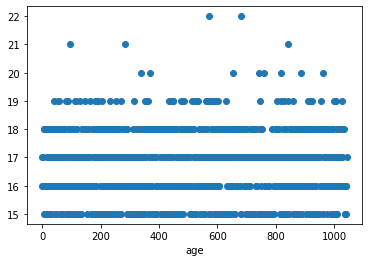

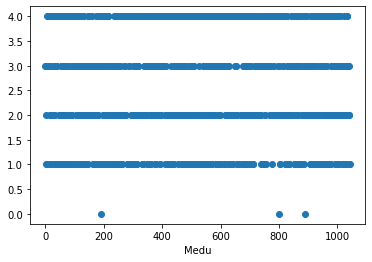

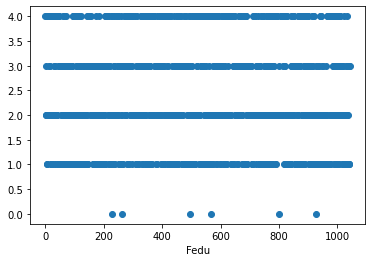

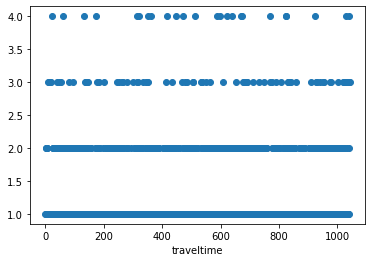

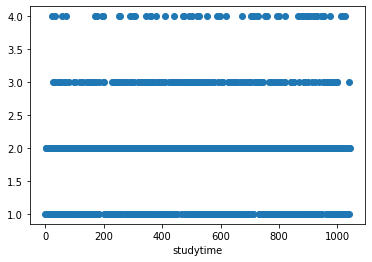

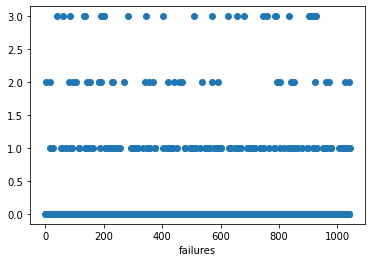

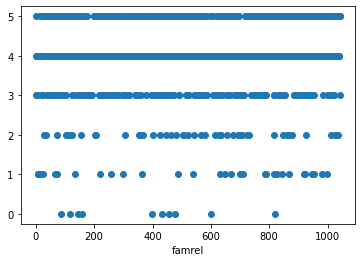

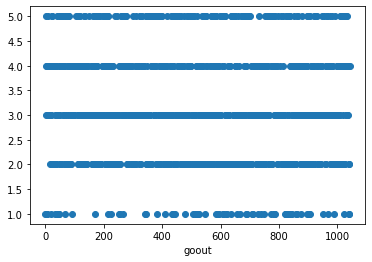

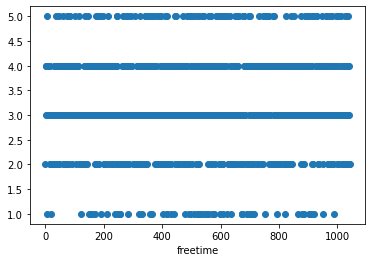

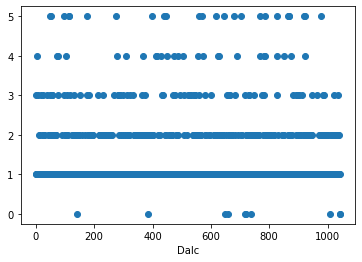

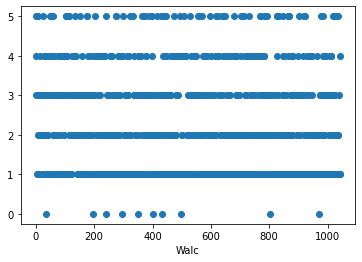

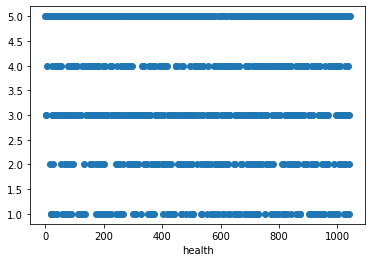

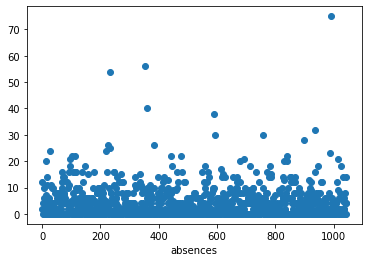

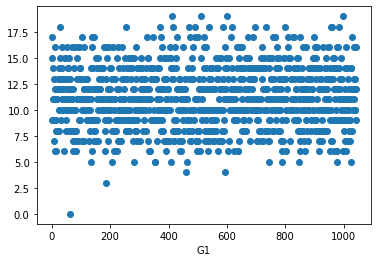

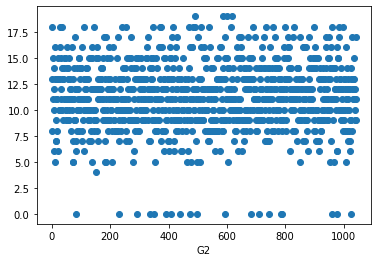

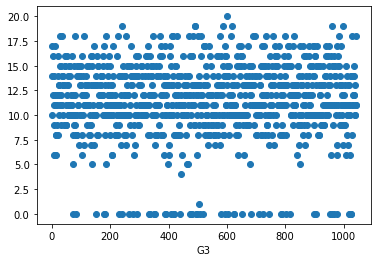

10
10
10


c:\users\dmk01\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


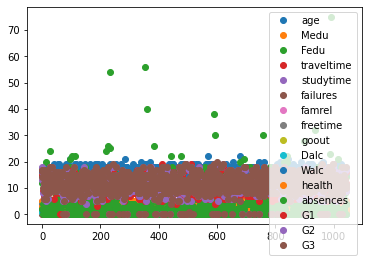

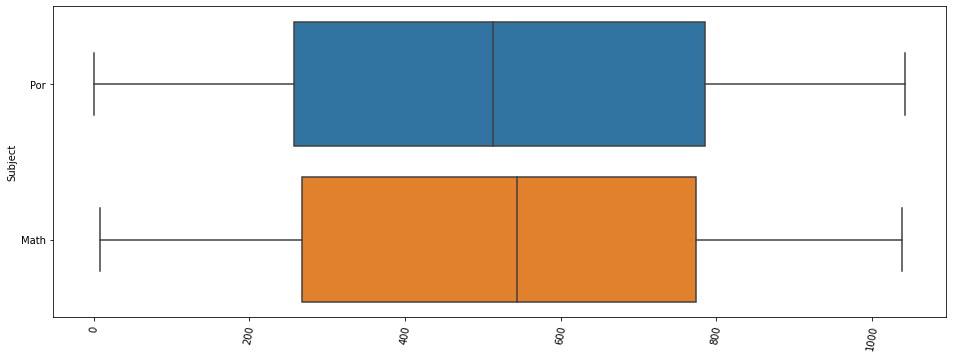

c:\users\dmk01\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


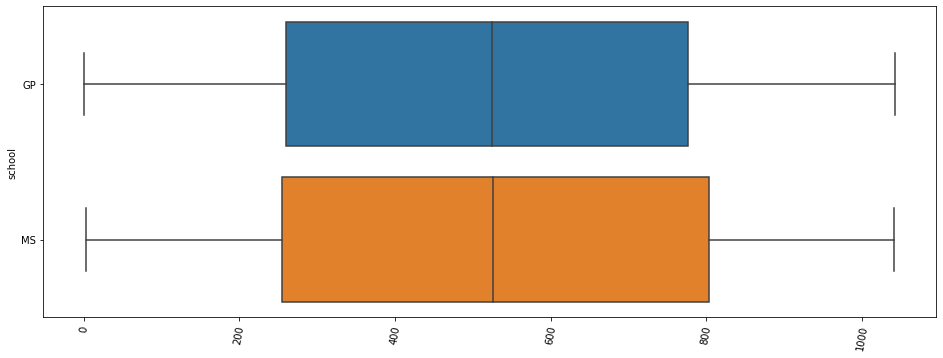

c:\users\dmk01\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


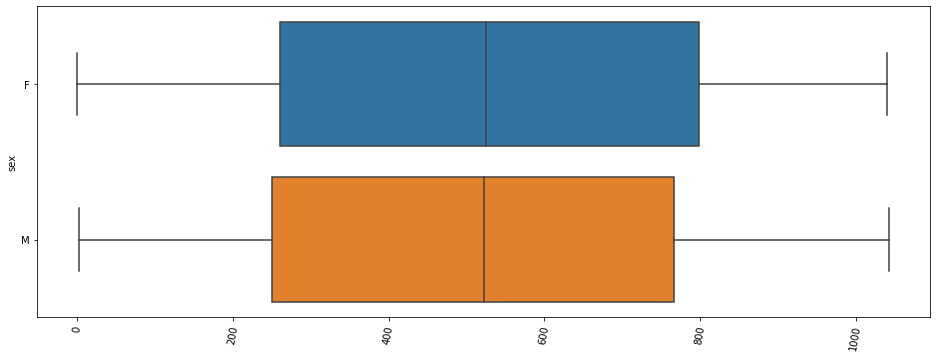

c:\users\dmk01\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


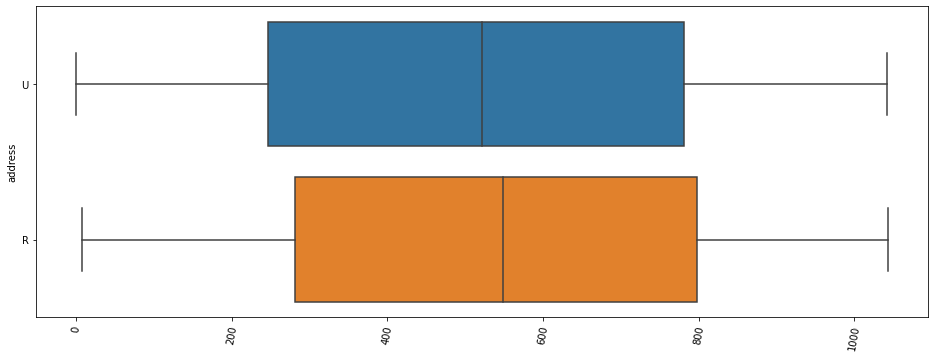

c:\users\dmk01\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


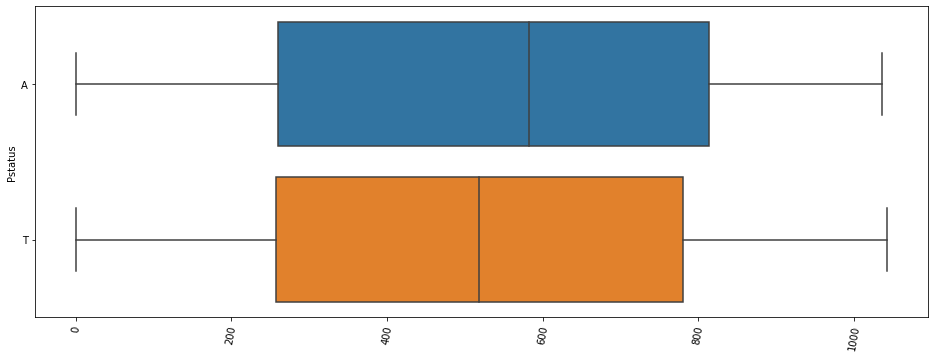

c:\users\dmk01\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


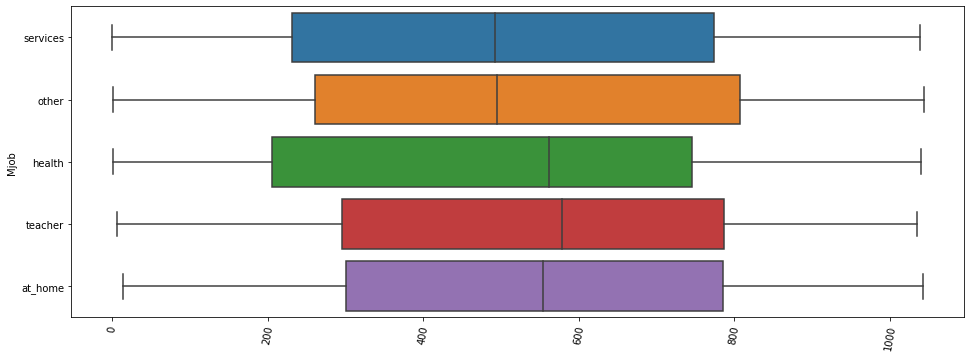

c:\users\dmk01\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


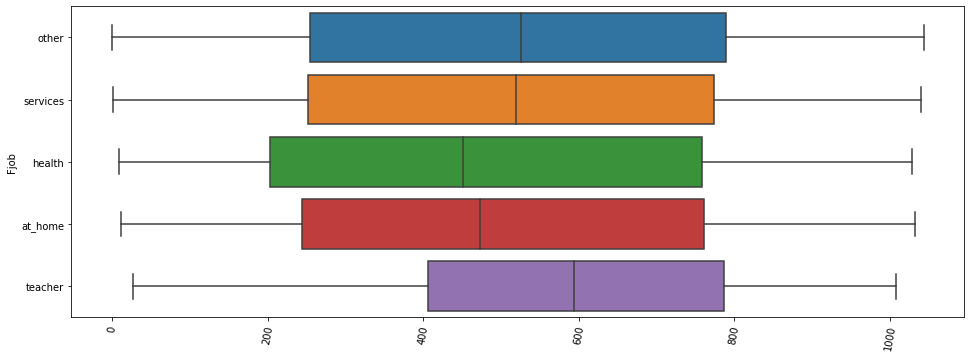

c:\users\dmk01\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


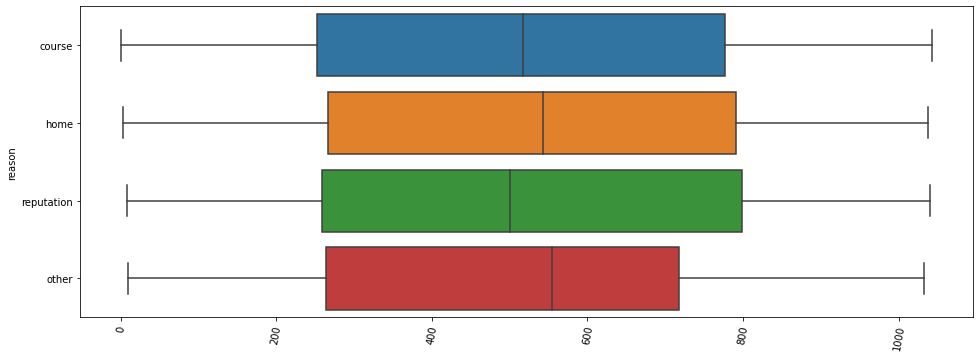

c:\users\dmk01\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


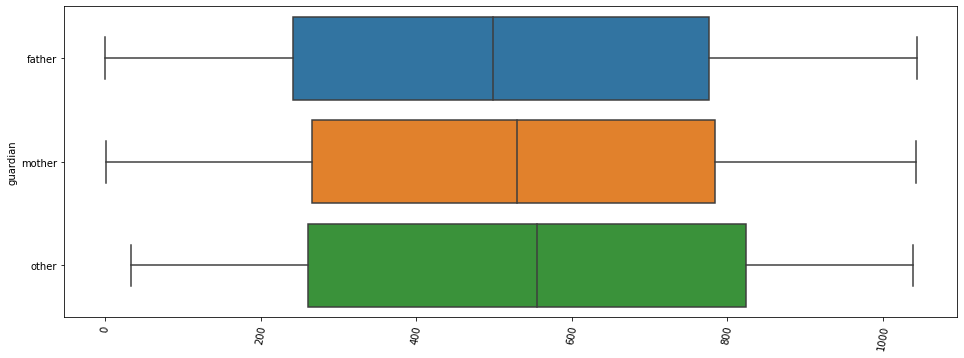

c:\users\dmk01\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyboardInterrupt: 

In [36]:
# your code here


# нарисуем графики гди исчисляемых величин
# видно, что столбики walc,dalc,famrel иногда принимают значения 0, хотя мы знаем что такого быть не может
numeric = ['age', 'Medu','Fedu','traveltime','studytime','failures',
           'famrel','goout','freetime','Dalc','Walc','health','absences','G1','G2','G3']
for col in numeric:
    plt.xlabel(col)
    data[col].plot(style = 'o')
    plt.show()
data.plot(style = 'o')
# посчитаем сколько таких значений
print(data[data['Walc'] < 1].shape[0])
print(data[data['Dalc'] < 1].shape[0])
print(data[data['famrel'] < 1].shape[0])
# # для остальных типов нарисуем бокс-плоты

not_numeric = ["Subject", "school", "sex", "address", "Pstatus", "Mjob", "Fjob", "reason", "guardian"
              "paid", "activities", "nursery", "higher"]
for col in categorial:
    plt.figure(figsize=(16, 8))
    x = data.index
    y = data[col]
    plt.subplots_adjust(bottom=0.25, top=0.79)
    ax = sns.boxplot(x, y)
    plt.xticks(rotation=80)
    plt.show()
    
# выбросов тут нет

### Задание 4 
  
* Посчитайте описательные статистики для числовых и для категориальных признаков. 
* Сколько студентов посещают каждую из школ?  
* Сколько студентов посещают математику, сколько - португальский?  
* Студенты какого курса чаще заваливают экзамены?  
* Сколько в среднем времени в неделю уходит на учебу по каждому предмету?  
* На что чаще обращают внимание при выборе школы?

In [37]:
# описательные характеристики
data.describe(include="all")
# Сколько студентов посещают каждую из школ?
print('GP =',data['school'].value_counts()['GP'])
print("MS = ",data['school'].value_counts()['MS'])
# Сколько студентов посещают математику, сколько - португальский?
print("POR = ",data['Subject'].value_counts()['Por'])
print("Math = ",data['Subject'].value_counts()['Math'])
# Студенты какого курса чаще заваливают экзамены?
g1 = data[data['G1'] < 5].shape[0]
g2 = data[data['G2'] <5].shape[0]
g3 = data[data['G3'] < 5].shape[0]
if g2 <= g1 <= g3:
    print("g3 = ",g3)
elif g1 >= g2:
    print("g1 = ",g1)
else:
    print("g2 = ",g2)
# Сколько в среднем времени в неделю уходит на учебу по каждому предмету? 
por_time = data[data["Subject"] == 'Por']['studytime'].mean()
math_time = data[data["Subject"] == 'Math']['studytime'].mean()
def printRes(subject):
    if float(subject) <= 1.0:
        print('Среднее время занятия : меньше 2 часов в неделю')
    elif 1.0 < float(subject) <= 2.0:
         print('Среднее время занятия : от 2 до 5 часов в неделю')
    elif 2.0 < float(subject) <= 3.0:
        print('Среднее время занятия : от 5 до 10 часов в неделю')
    else:
        print('Среднее время занятия : больше 10 часов в неделю')
print('Por')
printRes(por_time)
print("Math")
printRes(math_time)
# На что чаще обращают внимание при выборе школы?
print("Главная причина - ",data['reason'].value_counts().idxmax())

GP = 760
MS =  265
POR =  636
Math =  389
g2 =  20
Por
Среднее время занятия : от 2 до 5 часов в неделю
Math
Среднее время занятия : от 5 до 10 часов в неделю
Главная причина -  course


### Задание 5  
  
Оцените распределение оценок (отдельно для `G1`, `G2` и `G3`). Сравните распределения для разных предметов - математики и португальского языка. Сделайте выводы.  
  
**Tip:** Для выполнения задания пригодятся графики плотности, гистограммы и боксплоты.

c:\users\dmk01\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dmk01\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dmk01\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

<AxesSubplot:xlabel='G3', ylabel='Density'>

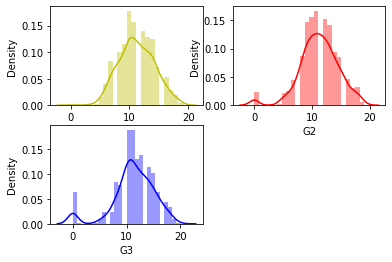

In [38]:
# your code here
import pylab as pl
pl.subplot (2, 2, 1)
sns.distplot(data['G1'], color='y')
pl.subplot (2, 2, 2)
sns.distplot(data['G2'], color='r')
pl.subplot (2, 2, 3)
sns.distplot(data['G3'], color='b')

больше всего завалов приходится на последний год, в то время как в первом году их почти нет(жизненно :( ). в остальном плотности схожи.

c:\users\dmk01\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dmk01\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dmk01\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

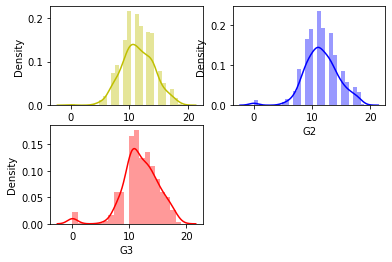

c:\users\dmk01\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dmk01\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dmk01\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

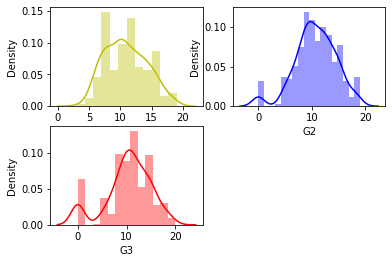

In [39]:
por = data.loc[data['Subject']=='Por', ['G1', 'G2', 'G3']]
math = data.loc[data['Subject']=='Math', ['G1', 'G2', 'G3']]

pl.subplot (2, 2, 1)
sns.distplot(por['G1'], color='y')
pl.subplot (2, 2, 2)
sns.distplot(por['G2'], color='b')
pl.subplot (2, 2, 3)
sns.distplot(por['G3'], color='r')
plt.show()
pl.subplot (2, 2, 1)
sns.distplot(math['G1'], color='y')
pl.subplot (2, 2, 2)
sns.distplot(math['G2'], color='b')
pl.subplot (2, 2, 3)
sns.distplot(math['G3'], color='r')
plt.show()

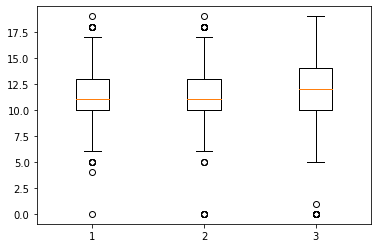

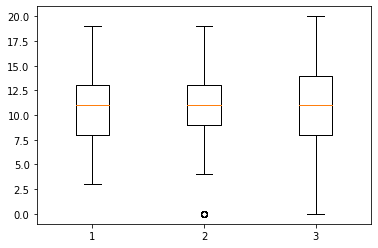

In [40]:
plt.boxplot([por['G1'], por['G2'], por['G3']])
plt.show()
plt.boxplot([math['G1'], math['G2'], math['G3']])
plt.show()

видно, что оценки по математике ниже. 

### Задание 6 
  
Оцените попарные зависимости числовых признаков.  
Рассчитайте и провизуализируйте матрицу корреляций. Дайте содержательный комментарий.

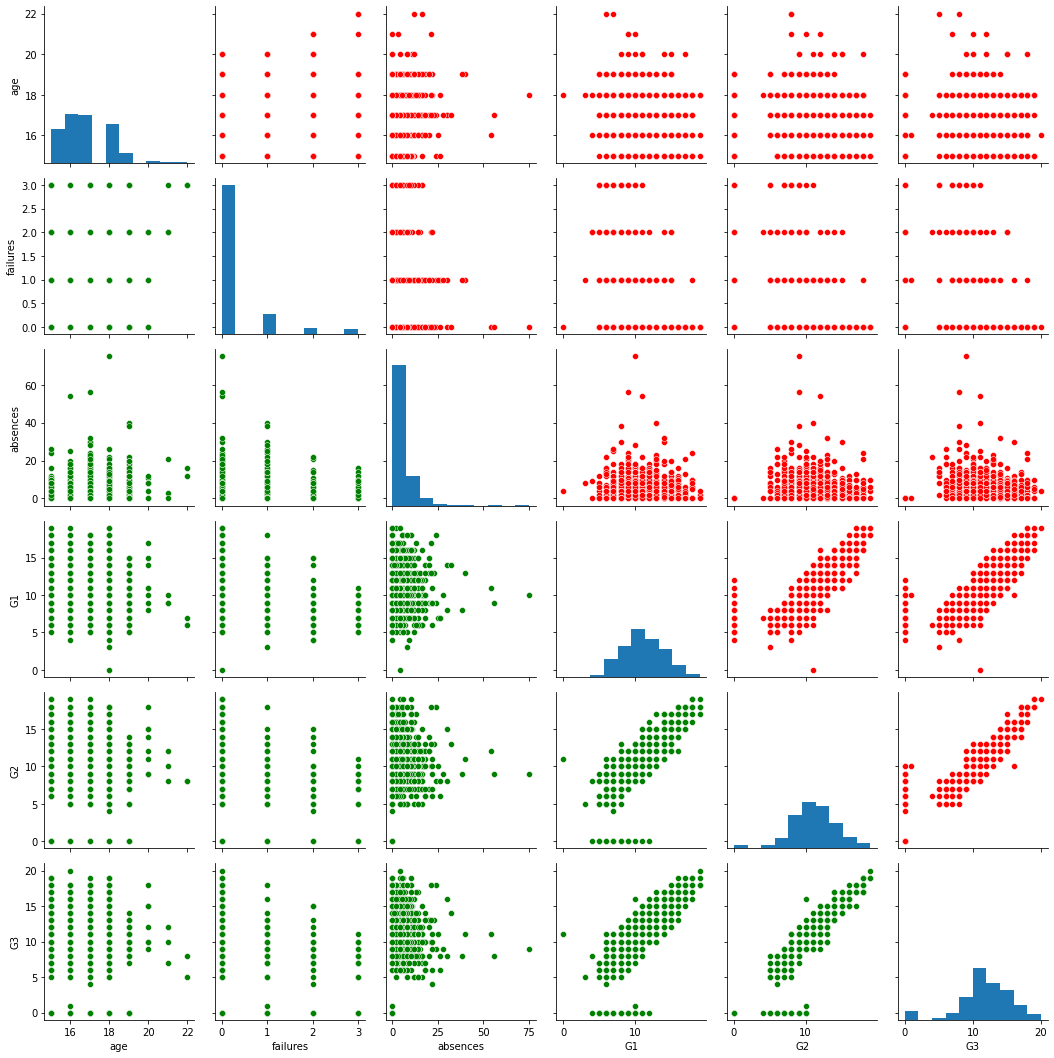

In [41]:
# your code here
numeric = ["age", "failures", "absences", "G1", "G2", "G3"]

g = sns.PairGrid(data.loc[:,numeric[:]])
g.map_upper(sns.scatterplot,color='red')
g.map_lower(sns.scatterplot, color='green')
g.map_diag(plt.hist)


выводы:
1. меньше всего провалов у студентов, которые не пропускают
2. прогульщики получают в основном средние оценки
3. чем больше пропусков, тем хуже оценки
4. успеваемость старших студентов выше
5. старшие студенты больше пропускают

### Задание 7  
  
Оцените попарные зависимости нечисловых (категориальных) признаков, дайте содержательный комментарий. 

In [42]:
# категориальных слишком много, и так сложнее сравнивать, поэтому самостоятельно разобью на пары.
categorial = ["Subject", "school", "sex", "address", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup",
              "paid", "activities", "nursery", "higher", "internet", "romantic", "cheating"]

<AxesSubplot:xlabel='address', ylabel='count'>

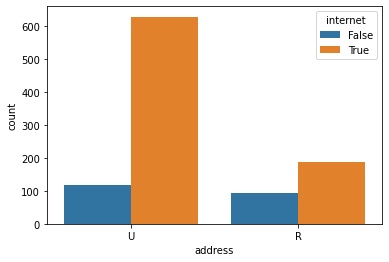

In [43]:
# your code here
sns.countplot(x="address", hue="internet", data=data)

у студентов , проживающих в городе, больше возможности выйти в интернет

<AxesSubplot:xlabel='traveltime', ylabel='count'>

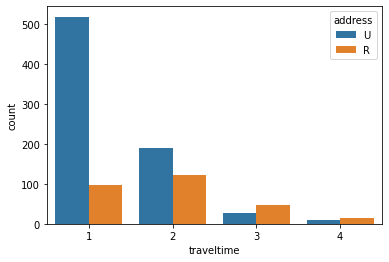

In [44]:
sns.countplot(x="traveltime", hue="address", data=data)

если студент живет за городом, он трати много времени на дорогу

<AxesSubplot:xlabel='Pstatus', ylabel='count'>

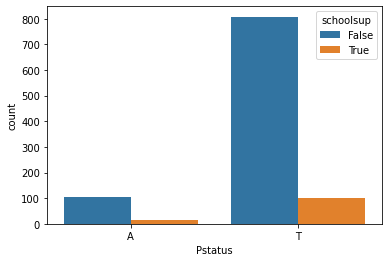

In [45]:
sns.countplot(hue="schoolsup", x="Pstatus", data=data)

студенты живущие с одним родителем и студенты живущие с обоими родителями редко нуждаются в помощи

<AxesSubplot:xlabel='sex', ylabel='count'>

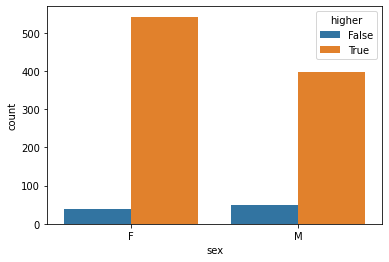

In [46]:
sns.countplot(x="sex", hue="higher", data=data)

cреди тех, кто решил получать высшее образование, больше девушек.

<AxesSubplot:xlabel='Dalc', ylabel='count'>

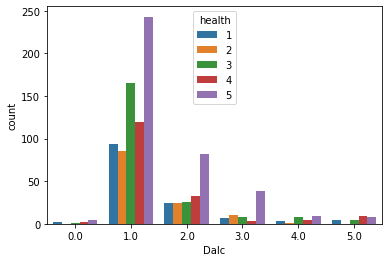

In [47]:
sns.countplot(x="Dalc", hue="health", data=data)

тот кто очень часто пьет алкоголь в буднии дни, имеет не такое хорошее здоровье

### Задание  8  
  
* Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?
* Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime. 
* Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).
* Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по `G3`). Выполните сравнение отдельно для каждого предмета (`Math` и `Por`). Дайте содержательный комментарий.  
  
**Tip:** для выполнения задания пригодятся боксплоты и гистограммы. 

In [48]:
# your code here
# разница в употреблении алкоголя между парнями и девушками. Кто пьет больше
# ПОСЧИТАЕМ СРЕДНЕЕ ЗНАЧЕНИЕ среди девушек и парней по значениям выпивания алкоголя с будние и выходные
men = data[data['sex'] == 'M']['Walc'].mean() + data[data['sex'] == 'M']['Dalc'].mean() 
women = data[data['sex'] == 'F']['Walc'].mean() + data[data['sex'] == 'F']['Dalc'].mean() 
if men > women:
    print("парни пьют больше")
else:
    print("девушки пьют больше")




парни пьют больше


In [49]:
# связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime
data.head()
# переиндексация
alc = data.loc[:, ['Walc', 'Dalc']].reset_index(drop=True)
# создадим новый столбик
alc_average = []
for i in range(len(alc)):
    alc_average.append((alc['Walc'][i] + alc['Dalc'][i]) / 2)
data['Total_alc'] = alc_average


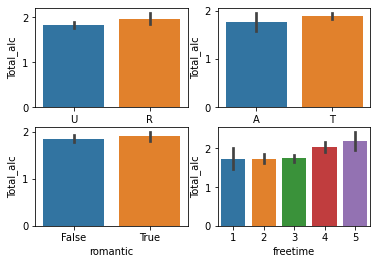

In [50]:
# Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).
pl.subplot (2, 2, 1)
sns.barplot(data=data, y='Total_alc', x='address', estimator=np.mean)
pl.subplot (2, 2, 2)
sns.barplot(data=data, y='Total_alc', x='Pstatus', estimator=np.mean)
pl.subplot (2, 2, 3)
sns.barplot(data=data, y='Total_alc', x='romantic', estimator=np.mean)
pl.subplot (2, 2,4 )
sns.barplot(data=data, y='Total_alc', x='freetime', estimator=np.mean)
plt.show()

алкоголь употребляют больше студенты, которые живут за городом, у которых родители живут вместе, состоящие в отношениях, и те у которых больше свободного времени


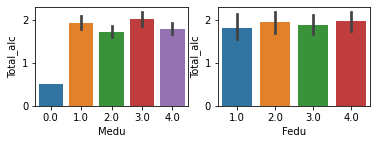

In [51]:
# Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).

columns = ['guardian', 'Medu','Total_alc','Fedu']
df1 = pd.DataFrame(data, columns=columns)

pl.subplot (2, 2, 1)
sns.barplot(data=df1[data['guardian'] == 'mother'], x = 'Medu',y='Total_alc',estimator=np.mean)
pl.subplot (2, 2, 2)
sns.barplot(data=df1[data['guardian'] == 'father'], x = 'Fedu',y='Total_alc',estimator=np.mean)
plt.show()


образование отцов не влияет на количество алкоголя
меньше всего употребляют матери, закончившие от 5 до 9 классов.

In [52]:
# Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по G3). 
# Выполните сравнение отдельно для каждого предмета (Math и Por). Дайте содержательный комментарий.
best = data.nlargest(50, 'G3')['Total_alc'].mean()
worst = data.nsmallest(50, 'G3')['Total_alc'].mean()
print(f'отличники выпивают = {best}, двоечники выпивают = {worst}')
# двоечники выпивают больше
best_m = data[data['Subject'] == 'Math'].nlargest(50,'G3').Total_alc.mean()
worst_m = data[data['Subject'] == 'Math'].nsmallest(50,'G3').Total_alc.mean()
best_p = data[data['Subject'] == 'Por'].nlargest(50,'G3').Total_alc.mean()
worst_p = data[data['Subject'] == 'Por'].nsmallest(50,'G3').Total_alc.mean()
print(f'математики отличники выпивают = {best_m}, двоечники выпивают = {worst_m}')
print(f'лингвисты отличники выпивают = {best_p}, двоечники выпивают = {worst_p}')

отличники выпивают = 1.51, двоечники выпивают = 1.77
математики отличники выпивают = 1.57, двоечники выпивают = 1.81
лингвисты отличники выпивают = 1.59, двоечники выпивают = 2.27


лингвиты прям алкоголики по сравнению с математиками)
тем не мнее все равно и лингвисты и математики двоечники выпивают больше

### Задание 9     
  
Оцените зависимость итоговой оценки от следующих признаков: 
  
* Пола
* Времени в пути от дома до школы
* Наличия дополнительной помощи в учебе (от членов семьи или вообще)
* Посещения платных дополнительных занятий
* Наличия интернета
* Наличия романтических отношений
* Употребления алкоголя  

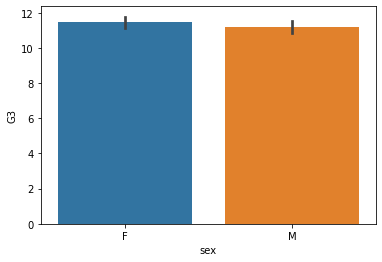

средняя у парней = 11.217977528089888,средняя у девушек = 11.46551724137931


In [53]:
# your code here
# df = pd.DataFrame(data, columns=['sex','G3'])
sns.barplot(data=pd.DataFrame(data, columns=['sex','G3']), x = 'sex',y='G3',estimator=np.mean)
plt.show()
mean_women = data[data['sex'] == 'F']['G3'].mean()
mean_men = data[data['sex'] == 'M']['G3'].mean()
print(f'средняя у парней = {mean_men},средняя у девушек = {mean_women}')

высший балл выше у парней
средняя оценка выше у девушек

<AxesSubplot:xlabel='traveltime', ylabel='G3'>

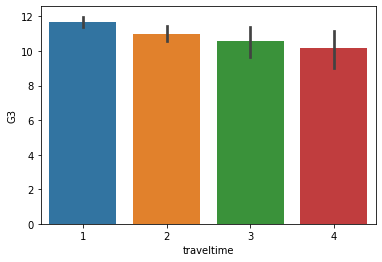

In [54]:
# Времени в пути от дома до школы
sns.barplot(data=pd.DataFrame(data, columns=['traveltime','G3']), x = 'traveltime',y='G3')

тот, кто живет ближе, учится лучше

<AxesSubplot:xlabel='schoolsup', ylabel='G3'>

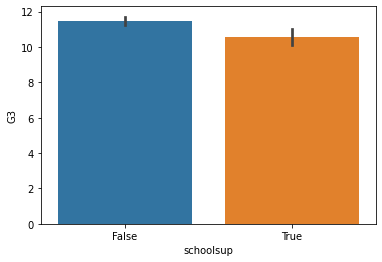

In [55]:
# Наличия дополнительной помощи в учебе (от членов семьи или вообще)
sns.barplot(data=pd.DataFrame(data, columns=['schoolsup','G3']), x = 'schoolsup',y='G3')

тот, кому не нужна помощь, лучше учится(логично)


<AxesSubplot:xlabel='paid', ylabel='G3'>

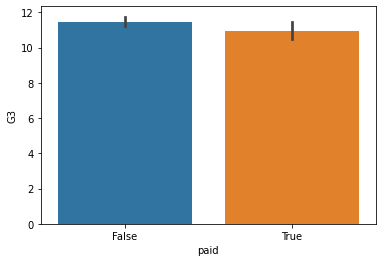

In [56]:
# Посещения платных дополнительных занятий
sns.barplot(data=pd.DataFrame(data, columns=['paid','G3']), x = 'paid',y='G3')

тот, кто не посещает платные занятия, учится лучше

<AxesSubplot:xlabel='internet', ylabel='G3'>

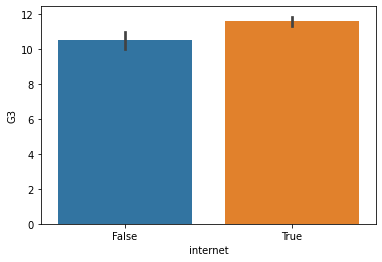

In [57]:
# Наличия интернета
sns.barplot(data=pd.DataFrame(data, columns=['internet','G3']), x = 'internet',y='G3')

студенты с интернето учатся лучше

<AxesSubplot:xlabel='romantic', ylabel='G3'>

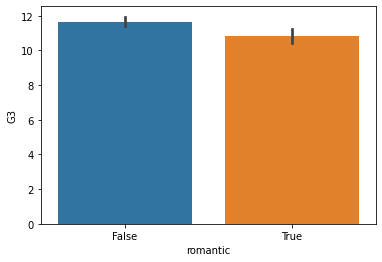

In [58]:
# Наличия романтических отношений
sns.barplot(data=pd.DataFrame(data, columns=['romantic','G3']), x = 'romantic',y='G3')

тот, у кого нет отношений, учится лучше

<AxesSubplot:xlabel='Total_alc', ylabel='G3'>

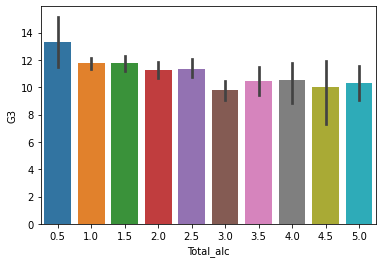

In [59]:
# Употребления алкоголя
sns.barplot(data=pd.DataFrame(data, columns=['Total_alc','G3']), x = 'Total_alc',y='G3',estimator=np.mean)

тот , кто совсем не пьет, учиться лучше

### Задание 10  
  
Добавьте в данные новый признак - итоговая оценка по 4-х балльной шкале:  

* Отлично: 18 <= `G3` <= 20
* Хорошо: 14 <= `G3` <= 17
* Удовлетворительно: 8 <= `G3` <= 13
* Неудовлетворительно: `G3` < 8  
  
Оцените распределение нового признака в зависимости от признака `reason` (причина выбора школы). Дайте содержательный комментарий. 

<AxesSubplot:xlabel='reason', ylabel='4-G3'>

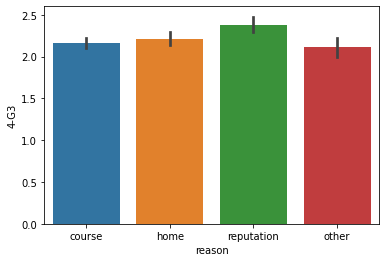

In [60]:
def map_mark(gr):
    if (gr <  8):
        return 1
    elif (8  <= gr <= 13):
        return 2
    elif (14 <= gr <= 17):
        return 3
    else:
        return 4
df = data.loc[:, 'G3']
data['4-G3'] =  df.map(map_mark)
sns.barplot(data=data, y="4-G3", x="reason")

итог лучше у тех, кто выбирал школу по репутации

### Задание  11 <a id="task11"></a>  
  
Часть из представленных в данных студентов посещали оба курса - `Math` и `Por`.  
* Предложите способ идентификации студентов и определите тех, кто посещал оба курса. Сколько таких студентов?  
* Для этих студентов сравните оценки по двум предметам, дайте комментарий.  
  
**Note:** Столбец `ID` является уникальным идентификатором наблюдения, но не студента. Он будет уникален для каждой строки.

студентов посещающих два курса =  15


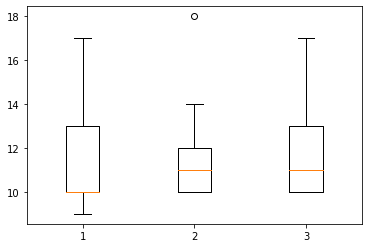

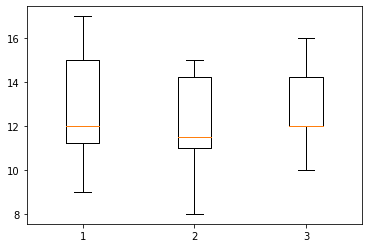

In [61]:
# # your code here
# создадим копию данных(сначала переиндексуем)
data = data.reset_index(drop=True)
df = data.copy(deep=True)
# у студентов ,которые посещали два курса разные только колонки с предметом,и оценками, дропним их
del df['Subject']
del df['G1']
del df['G2']
del df['G3']
print("студентов посещающих два курса = ",len(df)-len(df.drop_duplicates()))
data.head()
# дропним дубликаты
df = df.drop_duplicates()

all_students = set(data.index)
data.head()
after_drop = set(df.index)

# all_students - это все множество id
# after_drop - это множество без повторений
# найдем разницу двух мнодест - это и будут наши студенты
unic_id = all_students.difference(after_drop)

# найдем распределения по предмету
por = data.loc[list(unic_id)].loc[data['Subject']=='Por', ['G1', 'G2', 'G3']]
math =data.loc[list(unic_id)].loc[data['Subject']=='Math', ['G1', 'G2', 'G3']]
plt.boxplot([por['G1'], por['G2'], por['G3']])
plt.show()
plt.boxplot([math['G1'], math['G2'], math['G3']])
plt.show()


Видно, что средняя оценка по математике выше, так же по математике наивысшая и низшая оценки выше

### Задание 12  
  
Предложите простую модель для определения (предсказания) итоговой оценки студента по 4-х балльной системе. Оцените точность предложенной модели. 

c:\users\dmk01\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dmk01\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='4-G3', ylabel='Density'>

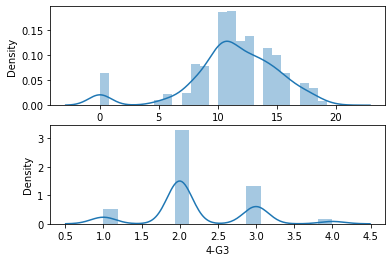

In [62]:
# your code here
# можно с помощью графика плотности 
pl.subplot (2, 1, 1)
sns.distplot(data["G3"])
pl.subplot (2, 1, 2)
sns.distplot(data["4-G3"])

### Задание * (бонусное)  
  
Дополнительное исследование данных и выводы положительно скажутся на оценке. 

In [ ]:
# your code here